# Inspect filtering with ACAE  
ACAE with 32D latent on 1500 epoch was used  
Test on entire Pt04 and Pt11r02c02 (WT well)  

### Plan  
1. Distribution of losses per well.  
2. Threshold based on AE and ADV losses.  
3. COmpare number of anomalies b/w wells. 

In [1]:
import json
import seaborn as sn
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up font for export to make it illustrator friendly
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# import JSON file for Pt04
with open('/home/aogorodnikov/aae_filter_Pt04/Pt04.json', 'r') as json_file:  
    pt04 = json.load(json_file)
    pt04 = pd.DataFrame(pt04)
    
# import JSON file for Pt11
with open('/home/aogorodnikov/aae_filter_Pt11_negOnly/Pt11.json', 'r') as json_file:  
    pt11 = json.load(json_file)
    pt11 = pd.DataFrame(pt11)

In [4]:
df = pd.concat([pt04, pt11], ignore_index=True)
df['log_ae_loss'] = np.log(df.ae_loss)
df.head()

,image,ae_loss,adv_loss,log_ae_loss
0,/sudoku/crop_rgb/Pt04/r01/Pt04_r01c01_f01_0021...,0.003903,0.757876,-5.546061
1,/sudoku/crop_rgb/Pt04/r01/Pt04_r01c01_f01_0022...,0.004455,0.653490,-5.413796
2,/sudoku/crop_rgb/Pt04/r01/Pt04_r01c01_f01_0023...,0.006427,0.528474,-5.047310
3,/sudoku/crop_rgb/Pt04/r01/Pt04_r01c01_f01_0024...,0.004339,0.554104,-5.440019
4,/sudoku/crop_rgb/Pt04/r01/Pt04_r01c01_f01_0026...,0.004436,0.757994,-5.418115


In [5]:
df.describe()

,ae_loss,adv_loss,log_ae_loss
count,5.738263e+06,5.738158e+06,5.738263e+06
mean,3.510992e-03,6.731847e-01,-5.866521e+00
std,2.665021e-03,6.530140e-02,6.759647e-01
min,1.158000e-04,2.900646e-01,-9.063646e+00
25%,1.901800e-03,6.301149e-01,-6.264954e+00
50%,3.022800e-03,6.756692e-01,-5.801572e+00
75%,4.468300e-03,7.191704e-01,-5.410747e+00
max,1.358810e-01,8.325546e-01,-1.995976e+00


## Distributions  
Compare distributions of losses within classes

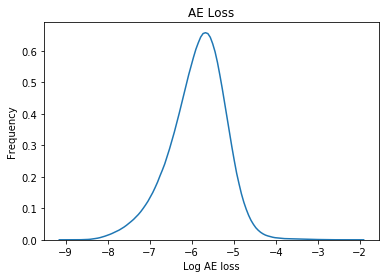

/home/aogorodnikov/anaconda3/envs/imgSudoku/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/aogorodnikov/anaconda3/envs/imgSudoku/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


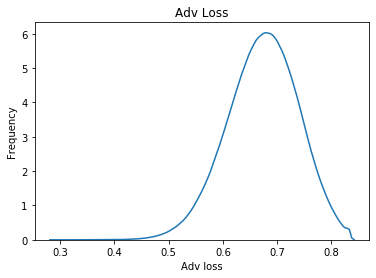

In [6]:
sns.distplot(np.log(df.ae_loss), hist=False)
plt.xlabel('Log AE loss')
plt.ylabel('Frequency')
plt.title('AE Loss')
plt.show()


sns.distplot(df.adv_loss, hist=False)
plt.xlabel('Adv loss')
plt.ylabel('Frequency')
plt.title('Adv Loss')
plt.show()

In [7]:
df['well'] = [re.search(r'Pt\d+_r\d\dc\d\d', x)[0] for x in df.image]

In [32]:
ae_thresh = np.nanpercentile(df.ae_loss, 85)
adv_thresh = np.nanpercentile(df.adv_loss, 85)

In [33]:
ae_thresh


0.0054373

In [34]:
adv_thresh

0.7413648

In [14]:
uniq_wells = df.well.unique()
num_anomalies = []
for i in uniq_wells:
    rel_df = df.loc[df.well==i,:]
    abs_num = rel_df.loc[(rel_df.ae_loss >= ae_thresh) | (rel_df.adv_loss >= adv_thresh)].shape[0]
    num_anomalies.append(abs_num*10e3/rel_df.shape[0])

[Text(0, 0, 'Pt04_r01c01'),
 Text(0, 0, 'Pt04_r01c02'),
 Text(0, 0, 'Pt04_r01c03'),
 Text(0, 0, 'Pt04_r01c04'),
 Text(0, 0, 'Pt04_r01c05'),
 Text(0, 0, 'Pt04_r01c06'),
 Text(0, 0, 'Pt04_r01c07'),
 Text(0, 0, 'Pt04_r01c08'),
 Text(0, 0, 'Pt04_r01c09'),
 Text(0, 0, 'Pt04_r01c10'),
 Text(0, 0, 'Pt04_r01c11'),
 Text(0, 0, 'Pt04_r01c12'),
 Text(0, 0, 'Pt04_r02c01'),
 Text(0, 0, 'Pt04_r02c02'),
 Text(0, 0, 'Pt04_r02c03'),
 Text(0, 0, 'Pt04_r02c04'),
 Text(0, 0, 'Pt04_r02c05'),
 Text(0, 0, 'Pt04_r02c06'),
 Text(0, 0, 'Pt04_r02c07'),
 Text(0, 0, 'Pt04_r02c08'),
 Text(0, 0, 'Pt04_r02c09'),
 Text(0, 0, 'Pt04_r02c10'),
 Text(0, 0, 'Pt04_r02c11'),
 Text(0, 0, 'Pt04_r02c12'),
 Text(0, 0, 'Pt04_r03c01'),
 Text(0, 0, 'Pt04_r03c02'),
 Text(0, 0, 'Pt04_r03c03'),
 Text(0, 0, 'Pt04_r03c04'),
 Text(0, 0, 'Pt04_r03c05'),
 Text(0, 0, 'Pt04_r03c06'),
 Text(0, 0, 'Pt04_r03c07'),
 Text(0, 0, 'Pt04_r03c08'),
 Text(0, 0, 'Pt04_r03c09'),
 Text(0, 0, 'Pt04_r03c10'),
 Text(0, 0, 'Pt04_r03c11'),
 Text(0, 0, 'Pt04_r0

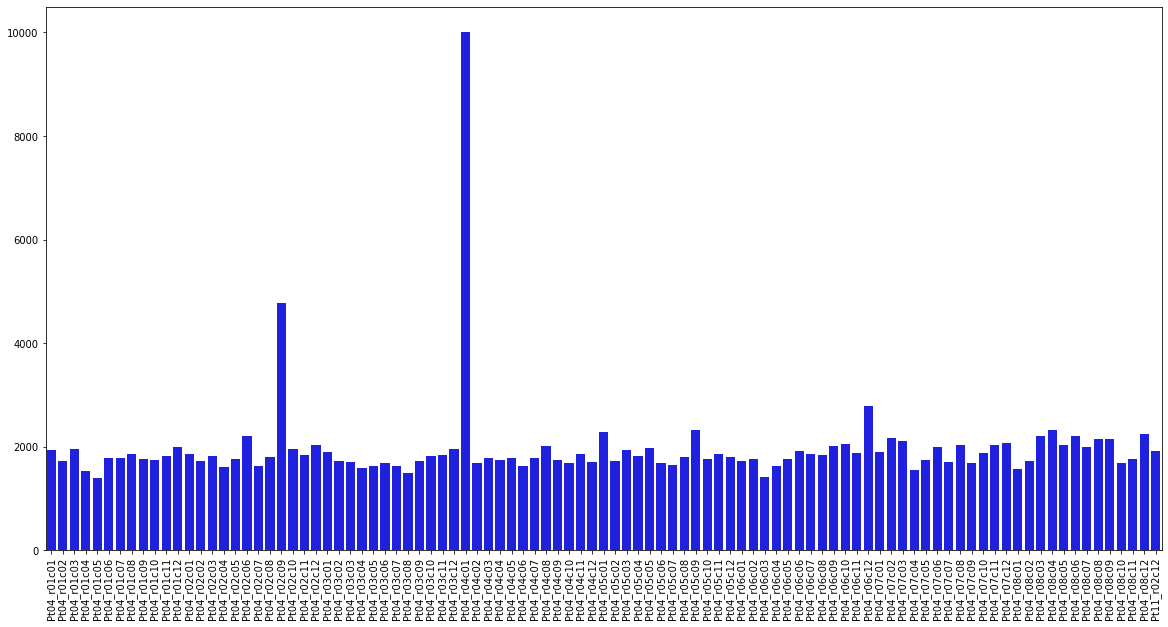

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
chart = sn.barplot(x=uniq_wells, y=num_anomalies, color='b')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [16]:
num_anomalies


[1943.9287823812338,
 1722.8544733254705,
 1962.756175549628,
 1528.4046692607003,
 1390.263290235712,
 1786.1337896431212,
 1789.1089854635836,
 1851.9483904600547,
 1752.1558018353137,
 1740.5394625317845,
 1813.0389889911726,
 1989.2802166212282,
 1850.4557392244708,
 1729.1830608259743,
 1811.9566595747679,
 1607.0145177519046,
 1752.2789323705372,
 2196.2081358404084,
 1625.5784081588436,
 1794.2155106219607,
 4764.795144157815,
 1955.8571453816112,
 1835.6005591353858,
 2028.3307810107196,
 1902.5809039850228,
 1718.1323782995091,
 1706.7557942030573,
 1586.5437126495967,
 1633.4622190182843,
 1691.7809299903752,
 1622.584251716978,
 1492.6253687315634,
 1721.6398323945175,
 1816.209584511573,
 1836.3294957827986,
 1955.7942105163645,
 10000.0,
 1679.967876323847,
 1776.9984137840709,
 1751.1770536488664,
 1786.5548246937421,
 1616.4661723533213,
 1779.350104821803,
 2015.9464355026523,
 1737.7519438363404,
 1682.2565091610415,
 1849.4126898314248,
 1705.7580028186028,
 2278.4637